Image loaded successfully.


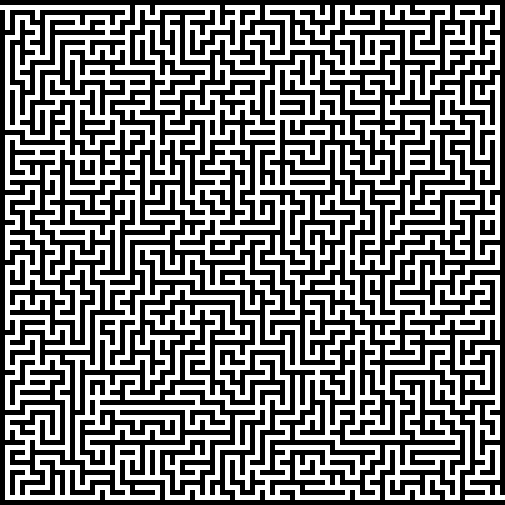

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(filename)

if img is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")

cv2_imshow(img)

In [ ]:
import cv2
import numpy as np
from google.colab import files

def image_to_binary_maze(image, grid_size):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Invert the binary image
    binary_image = cv2.bitwise_not(binary_image)

    # Get image dimensions
    height, width = binary_image.shape

    # Calculate grid cell size
    cell_height = height // grid_size
    cell_width = width // grid_size

    # Initialize binary maze
    binary_maze = np.zeros((grid_size, grid_size), dtype=int)

    # Iterate through each grid cell
    for i in range(grid_size):
        for j in range(grid_size):
            # Get the current grid cell
            cell = binary_image[i * cell_height: (i+1) * cell_height, j * cell_width: (j+1) * cell_width]

            # Check if the cell contains a wall
            if np.any(cell == 255):
                binary_maze[i][j] = 1  # Wall
            else:
                binary_maze[i][j] = 0  # Path

    return binary_maze

def save_maze_to_file(binary_maze, filename):
    with open(filename, 'w') as file:
        for row in binary_maze:
            file.write(' '.join(map(str, row)) + '\n')


In [ ]:

# Define grid size (adjust as needed)
grid_size = 50

# Convert the maze image to binary maze
binary_maze = image_to_binary_maze(img, grid_size)

# Save the binary maze to a text file
output_filename = 'maze_binary.txt'
save_maze_to_file(binary_maze, output_filename)

print("Binary maze saved as", output_filename)

# Download the file
files.download(output_filename)

Binary maze saved as maze_binary.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image loaded successfully.


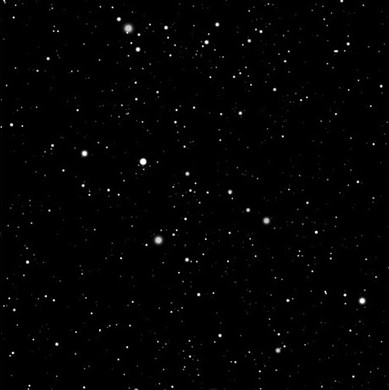

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(filename)

if img is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")

cv2_imshow(img)

# Save the image as a JPEG file
cv2.imwrite("converted_image.jpg", img)

# Download the converted image
files.download("converted_image.jpg")

In [ ]:
import cv2
import numpy as np
import random

# Load the image
image = cv2.imread(filename)

# Define the number of images
num_images = 51

# Loop to create 51 different images with random dots
for i in range(50, 51):
    # Copy the original image
    modified_image = np.copy(image)

    # Generate random coordinates for the dot
    x = random.randint(0, image.shape[1]-1)
    y = random.randint(0, image.shape[0]-1)

    # Generate random color for the dot (black or white)
    color = random.choice([0, 255])

    # Put the dot on the image
    modified_image[y, x] = [color, color, color]  # Assuming 3-channel color image

    # Save the modified image
    cv2.imwrite(f"image_{i+1}.jpg", modified_image)

    # Download the converted image
    files.download(f"image_{i+1}.jpg")

print(f"{num_images} images with random dots saved.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

51 images with random dots saved.


In [ ]:
from matplotlib import pyplot as plt

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Select ROI for cropping')
plt.axis('on')

# Select ROI using mouse
cv2.selectROI("Select ROI", img)

# Close the window after ROI selection
cv2.destroyAllWindows()

# Crop the image based on the selected ROI
cropped_image = img[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.show()

# Save the cropped image as a PPM file
cv2.imwrite("cropped_image.ppm", cropped_image)

print("Cropped image saved as cropped_image.ppm")

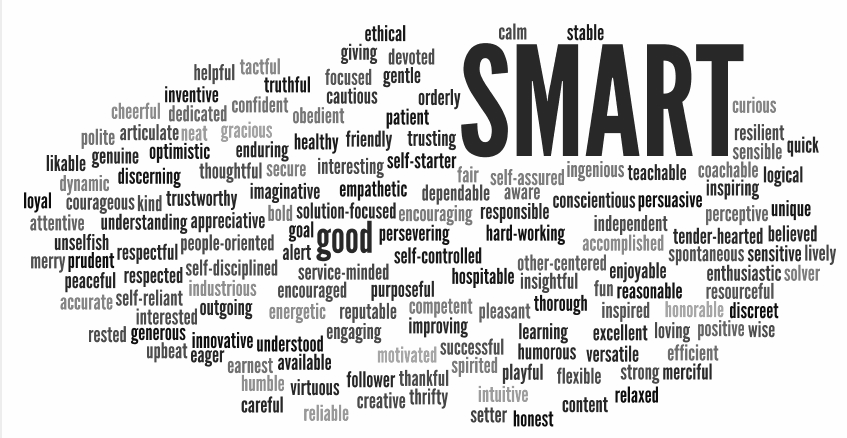

In [ ]:
import numpy as np

def custom_cvtColor(image):
    # Convert image to grayscale manually
    gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    return gray_image

gray_image = custom_cvtColor(img)

cv2_imshow(gray_image)

In [ ]:
def custom_copyMakeBorder(image, padding_size):
    # Manually add padding to the image
    height, width = image.shape[:2]
    padded_image = np.zeros((height + 2 * padding_size, width + 2 * padding_size), dtype=image.dtype)
    padded_image[padding_size:padding_size + height, padding_size:padding_size + width] = image
    return padded_image

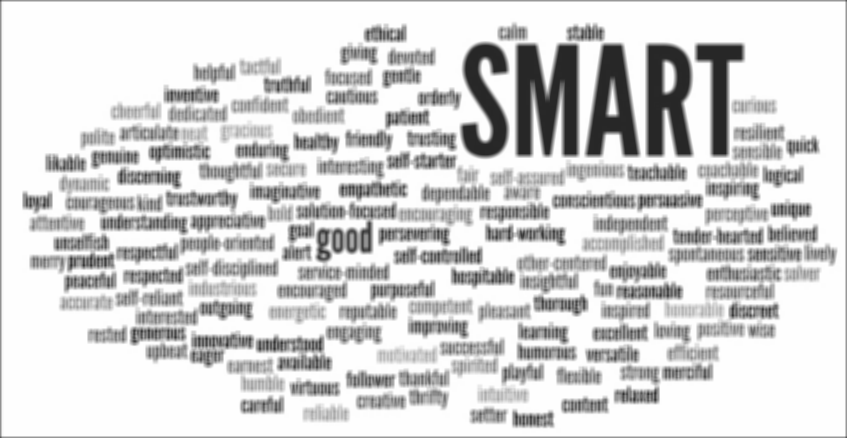

In [ ]:
def custom_blur(image, kernel_size):
    blurred_image = np.zeros_like(image, dtype=np.float32)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

    padding = kernel_size // 2
    padded_image = custom_copyMakeBorder(image, padding)

    height, width = image.shape[:2]

    for y in range(padding, height + padding):
        for x in range(padding, width + padding):
            roi = padded_image[y - padding:y + padding + 1, x - padding:x + padding + 1]
            blurred_image[y - padding, x - padding] = np.sum(roi * kernel)

    return blurred_image.astype(np.uint8)

blurred_image = custom_blur(gray_image, kernel_size=5)

cv2_imshow(blurred_image)

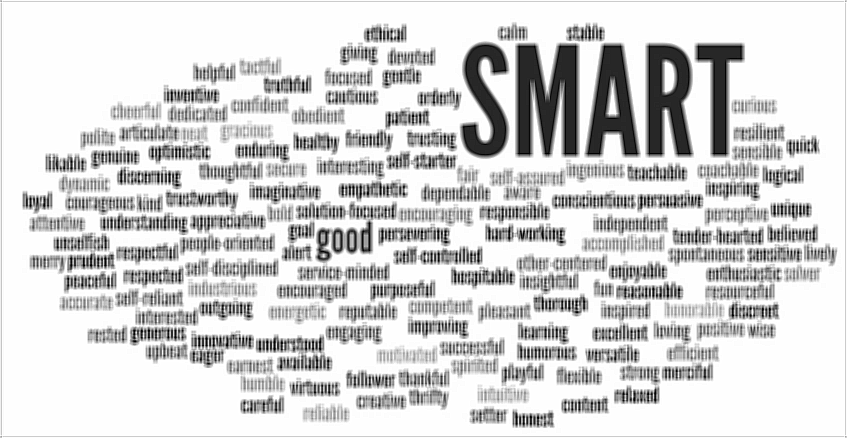

In [ ]:
def custom_sharpen(image):
    sharpened_image = np.zeros_like(image, dtype=np.float32)
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

    padding = 1
    padded_image = custom_copyMakeBorder(image, padding)

    height, width = image.shape[:2]

    for y in range(padding, height + padding):
        for x in range(padding, width + padding):
            roi = padded_image[y - padding:y + padding + 1, x - padding:x + padding + 1]
            sharpened_image[y - padding, x - padding] = np.sum(roi * laplacian_kernel)

    return image - sharpened_image

sharpened_image = custom_sharpen(blurred_image)

cv2_imshow(sharpened_image)